In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, precision_score, recall_score, mean_squared_error, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

In [23]:
data = pd.read_csv("C:\\Users\\milan\\OneDrive\\Desktop\\BIA_Study\ML\\bank_customer_churn.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [42]:
data.sample(5)   #it gives 5 random columns from data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
7600,683,30,1,113257.20,1,1,1,65035.02,0,False,True,True
7842,734,43,7,107805.67,1,0,0,182505.68,0,False,False,True
7695,723,47,10,90450.00,2,0,0,103379.31,1,True,False,False
3901,575,30,2,0.00,2,1,1,82222.86,0,False,True,True
1596,769,27,7,188614.07,1,1,0,171344.09,0,True,False,True


In [24]:
data = data.drop(columns=["RowNumber", "CustomerId", "Surname"])

In [25]:
data = pd.get_dummies(data, columns=["Geography", "Gender"], drop_first=True)

In [26]:
x = data.drop('Exited', axis=1)
y = data['Exited']

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [28]:
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=24)

In [30]:
Linear = LinearRegression()
Linear.fit(x_train, y_train)

LinearRegression()

In [31]:
Logistics = LogisticRegression()
Logistics.fit(x_train, y_train)

LogisticRegression()

In [32]:
DesTree = DecisionTreeClassifier()
DesTree.fit(x_train, y_train)

DecisionTreeClassifier()

In [33]:
Random = RandomForestClassifier()
Random.fit(x_train, y_train)

RandomForestClassifier()

In [34]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [35]:
Knn = KNeighborsClassifier()
Knn.fit(x_train, y_train)

KNeighborsClassifier()

In [36]:
Grad = GradientBoostingClassifier()
Grad.fit(x_train, y_train)

GradientBoostingClassifier()

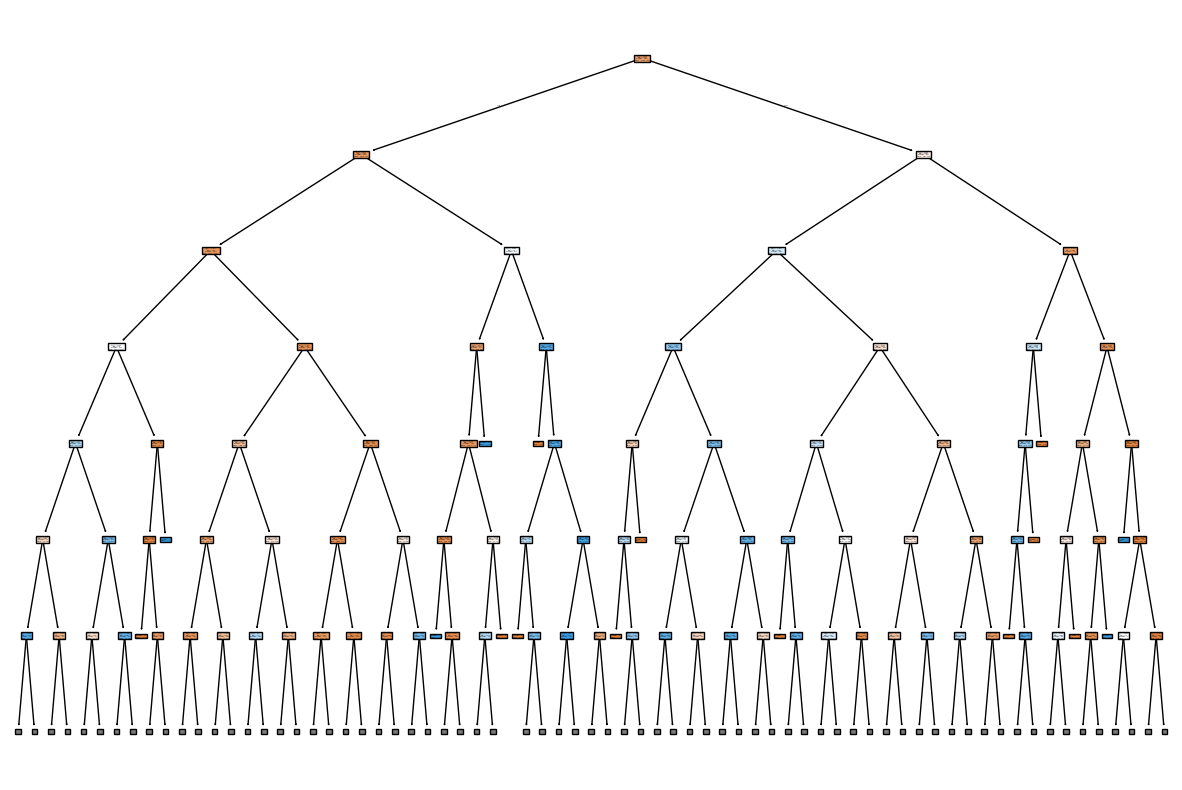

In [37]:
plt.figure(figsize=(15, 10))
tree.plot_tree(DesTree, filled=True, max_depth=6)
plt.show()

In [38]:
Linear_y_pred = Linear.predict(x_test)
Logistics_y_pred = Logistics.predict(x_test)
DesTree_y_pred = DesTree.predict(x_test)
Random_y_pred = Random.predict(x_test)
svc_y_pred = svc.predict(x_test)
Knn_y_pred = Knn.predict(x_test)
Grad_y_pred = Grad.predict(x_test)

In [39]:
Linear_MSE = mean_squared_error(y_test, Linear_y_pred)
Logistics_Accuracy = accuracy_score(y_test, Logistics_y_pred)
DesTree_Accuracy = accuracy_score(y_test, DesTree_y_pred)
Random_Accuracy = accuracy_score(y_test, Random_y_pred)
svc_Accuracy = accuracy_score(y_test, svc_y_pred)
Knn_Accuracy = accuracy_score(y_test, Knn_y_pred)
Grad_Accuracy = accuracy_score(y_test, Grad_y_pred)

In [40]:
print("ACCURACY : ")
print(f"Linear_MSE: {Linear_MSE}")
print(f"Logistics_Accuracy: {Logistics_Accuracy}")
print(f"DesTree_Accuracy: {DesTree_Accuracy}")
print(f"Random_Accuracy: {Random_Accuracy}")
print(f"svc_Accuracy: {svc_Accuracy}")
print(f"Knn_Accuracy: {Knn_Accuracy}")
print(f"Grad_Accuracy: {Grad_Accuracy}")

ACCURACY : 
Linear_MSE: 0.13602831689567202
Logistics_Accuracy: 0.8152
DesTree_Accuracy: 0.7992
Random_Accuracy: 0.8536
svc_Accuracy: 0.8564
Knn_Accuracy: 0.8352
Grad_Accuracy: 0.8492
